In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
import math
import scipy
from scipy.stats.stats import pearsonr

import sys
sys.path.append("../")
from credit_tools.tools import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [5]:
linear_regression = sm.OLS(y, X)
linear_regression

In [6]:
fitted_model = linear_regression.fit()
fitted_model

In [7]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.49e-74
Time:                        15:03:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
fitted_model.params

const   -34.670621
RM        9.102109
dtype: float64

In [9]:
betas = np.array(fitted_model.params)
betas

array([-34.67062078,   9.10210898])

In [10]:
fitted_values = fitted_model.predict(X)
fitted_values

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [11]:
mean_sum_squared_errors = np.sum((dataset['target'] - dataset['target'].mean())**2)
regr_sum_squared_errors = np.sum((dataset['target'] - fitted_values)**2)
(mean_sum_squared_errors - regr_sum_squared_errors) / mean_sum_squared_errors

0.4835254559913342

In [12]:
(pearsonr(dataset['RM'], dataset['target'])[0])**2

0.483525455991334

In [13]:
9.1021 * 4.55 - 34.6706

6.743955

In [14]:
9.1021 * 5.55 - 34.6706

15.846055

In [15]:
(np.min(dataset['RM']), np.max(dataset['RM']))

(3.561, 8.78)

In [46]:
def standardize(x):
    return (x - np.mean(x)) /np.std(x)

In [47]:
residuals = dataset['target'] - fitted_values
normalized_residuals = standardize(residuals)
normalized_residuals

0     -0.178060
1     -0.329244
2      0.601533
3      0.662428
4      0.881082
         ...   
501   -0.445184
502   -0.065770
503   -0.745970
504   -0.782834
505   -1.259277
Length: 506, dtype: float64

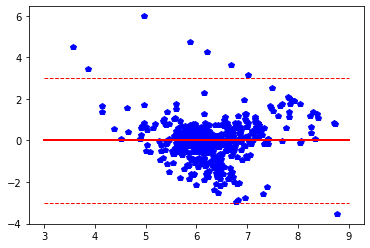

In [49]:
residual_scatter_plot = plt.plot(dataset['RM'], normalized_residuals, 'bp')
x_range = [dataset['RM'].min(), dataset['RM'].max()]
mean_residual = plt.plot(
    [int(x_range[0]), round(x_range[1], 0)],
    [0, 0],
    '-',
    color='red',
    linewidth=2
)
upper_bound = plt.plot(
    [int(x_range[0]), round(x_range[1], 0)],
    [3, 3],
    '--',
    color='red',
    linewidth=1
)
lower_bound = plt.plot(
    [int(x_range[0]), round(x_range[1], 0)],
    [-3, -3],
    '--',
    color='red',
    linewidth=1
)


### 회귀모델을 이용한 예측 

In [52]:
RM = 5
Xp = np.array([1, RM])
print("Our model predicts if RM = %01.f the answer value is %0.1f" % (RM, fitted_model.predict(Xp)))

Our model predicts if RM = 5 the answer value is 10.8


In [54]:
x_range = [dataset['RM'].min(), dataset['RM'].max()]
x_range

[3.561, 8.78]

In [55]:
y_range = [dataset['target'].min(), dataset['target'].max()]
y_range

[5.0, 50.0]

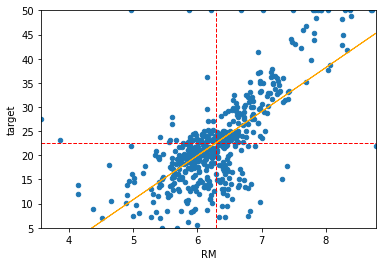

In [63]:
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', 
                           xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range,
                        [dataset['target'].mean(), dataset['target'].mean()],
                        '--', color='red', linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()],
                          y_range,
                          '--', color='red', linewidth=1)
regression_line = scatter_plot.plot(dataset['RM'], 
                                    fitted_values, 
                                    '-', color='orange', linewidth=1)

In [67]:
predictions_by_dot_product = np.dot(X, betas)
print("Using the prediction method: %s" % fitted_values[:10])
print("Using betas and a dot product: %s" % predictions_by_dot_product[:10])


Using the prediction method: 0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
5    23.855940
6    20.051258
7    21.507596
8    16.583355
9    19.978442
dtype: float64
Using betas and a dot product: [25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


### Scikit-learn을 사용한 회귀

In [70]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
linear_regression

LinearRegression()

In [71]:
observations = len(dataset)
observations

506

In [72]:
X = dataset['RM'].values.reshape((observations, 1))
y = dataset['target'].values

In [74]:
linear_regression.fit(X, y)

LinearRegression()

In [75]:
print(linear_regression.coef_)
print(linear_regression.intercept_)

[9.10210898]
-34.67062077643857


In [76]:
print(linear_regression.predict(X)[:10])

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


In [77]:
Xp = np.column_stack((X, np.ones(observations)))
Xp

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [80]:
v_coef = list(linear_regression.coef_) + [linear_regression.intercept_]
v_coef

[9.10210898118031, -34.67062077643857]

In [82]:
np.dot(Xp, v_coef)[:10]

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155])

In [83]:
from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples=10000000, n_features=1, n_targets=1, random_state=1-1)

In [84]:
%%time
sk_linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
sk_linear_regression.fit(HX, Hy)

CPU times: user 497 ms, sys: 89.1 ms, total: 586 ms
Wall time: 345 ms


LinearRegression()

In [86]:
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

CPU times: user 1.79 s, sys: 477 ms, total: 2.27 s
Wall time: 1.31 s
